<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 - West Nile Virus Prediction (Kaggle) <br> [Part 4 of 4]

_Prepared by: Kho Guan Guo, Soh Sze Ron, Timothy Chan, 3 Apr 2023_

# Contents:
- [Cost Benefit Analysis](#Cost-Benefit-Analysis)
- [Recommendations](#Recommendations)
- [Conclusion](#Conclusion)

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
# Cost Benefit Analysis
---

We will do a cost-benefit analysis to assess the financial and health impacts of various levels of pesticide coverage. Our goal is to find the optimal balance between the total costs and the level of benefit achieved. This may involve considering different levels of coverage and their associated costs and benefits, and weighing these factors against each other to determine the most effective and efficient approach.

The different levels of coverage we consider are:
1. area of coverage
2. number of months to spray
3. frequency of spraying

The Chicago Department of Public Health (CDPH) conducts mosquito spraying to reduce the occurrence of the West Nile Virus (WNV). They use an insecticide known as [Zenivex E4](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf), which costs [$85.30 per gallon](https://bidcondocs.delaware.gov/NAT/NAT_19123-INSECTICIDE_An.pdf), to kill adult mosquitoes when WNV-infected mosquitoes have been detected. This happens on a weekly basis from July-September. It is [sprayed from the truck](https://www.cmmcp.org/pesticide-information/pages/zenivex-e4-etofenprox) at a vehicle speed of 10-15 miles per hour, applied at a rate of 1.5 fluid ounces per acre. 

## Base Scenario: Full Coverage + Weekly Spray + Jul - Sep period

#### Costs

Chicago has a land area of 589.82 $ km^2$ which is equivalent to 145,747.7 acres. WNV season is from Jul-Sep, thus number of applications will be 12 across 12 weeks. 

Based on the above statistics, the cost of spraying Zenivex E4 is:
- Spray amount =  1708 gallons
- Total cost of spray = \$145,693
- 12 weeks = \$1,748,316

Assuming there are 50 trucks available, each truck having a spray radius of 100sqft and travelling at 10mph:
- Area covered by 1 truck = 0.72 acres / min
- Time taken for 50 trucks to cover Chicago = 67.5h

Total manpower costs for 12 weeks assuming \\$20/h = \$810,000

Thus, the annual total cost of spraying entire Chicago area for WNV season is **\$2.558m**.

#### Benefits

The quantifiable benefits from mosquito spraying are: 
- savings in medical expenses associated to WNV 
- economic benefits reaped from each individual from not being infected

For simplicity we will assume that spraying is 100% effective, meaning that spraying will eliminate all mosquitoes in that area for that period.

Based on figures reported by the [American Society of Tropical Medicine & Hygiene](https://www.astmh.org/CMSPages/GetFile.aspx?guid=823fde2b-6fa4-4e07-ae52-9dc10f1d5e54), the medical costs associated with WNV in the U.S amounts to [$57 million annually](https://www.npr.org/sections/health-shots/2014/02/11/275262857/the-high-cost-of-treating-people-hospitalized-with-west-nile-virus#:~:text=The%20U.S%20recorded%20its%20first,of%20Tropical%20Medicine%20and%20Hygiene). From this article by [National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786/#:~:text=There%20were%201%2C371%20total%20human,(Cook%20and%20DuPage%20Counties).), it states that the proportion of WNV cases in Chicago is 66% of that in its state, Illinois. Thus, we interpolated the annual cases in Illinois to derive our estimated number of WNV cases in Chicago. For estimated medical costs in Chicago, we used its [proportion](https://www.cdc.gov/westnile/statsmaps/cumMapsData.html#one) in cases out of the total number of cases from 2002 - 2021, this works out to be approximately \$36.6 million over 20 years, an average of \\$1.83 million annually.

The table below illustrates figures extracted from CDC and our interpolated calculations on the Chicago cases, Chicago percentage WNV cases in US and Chicago medical costs in the last 3 columns.

In [2]:
# cba csv file derived from cdc website
cba = pd.read_csv('../data/data_external/cba_v1.csv')

# obtaining estimated wnv  cases in Chicago = 66% of Illinois (source from NCBI) linked above
cba['Chicago WNV Cases (Estimated)'] = cba['Illinois WNV Cases (CDC)'].apply(lambda x: int(round((x * 0.66), 0)))

# find the percentage of wnv cases in Chicago out of the entire US cases
cba['wnv_chicago_div_us'] = round(cba['Chicago WNV Cases (Estimated)'] / cba['Total U.S WNV Cases (CDC)'], 4)
cba['Chicago % Cases in U.S (Estimated)'] = round((cba['Chicago WNV Cases (Estimated)'] / cba['Total U.S WNV Cases (CDC)']) * 100, 2)

# finding the estimated medical costs in Chicago by using the percentage of cases in Chicago, out of $57 million medical cost per year
cba['Chicago Medical Costs (Estimated)'] = cba['wnv_chicago_div_us'].apply(lambda x: int(round((x * 57000000), 0)))

cba = cba.drop('wnv_chicago_div_us', axis=1)
cba

,Year,Illinois WNV Cases (CDC),Total U.S WNV Cases (CDC),Chicago WNV Cases (Estimated),Chicago % Cases in U.S (Estimated),Chicago Medical Costs (Estimated)
0,2002,884,4156,583,14.03,7997100
1,2003,54,9862,36,0.37,210900
2,2004,60,2539,40,1.58,900600
3,2005,252,3000,166,5.53,3152100
4,2006,215,4269,142,3.33,1898100
5,2007,101,3630,67,1.85,1054500
6,2008,20,1356,13,0.96,547200
7,2009,5,720,3,0.42,239400
8,2010,61,1021,40,3.92,2234400
9,2011,34,712,22,3.09,1761300


The positive economic benefits of each individual per working day is [estimated](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R5) to be \\$955 for those below 60 and \\$625 for those above 60. For our calculation purposes, we shall use \\$800 as an individual's economic daily rate. As symptoms usually last 3-6 days, we estimate each individual's potential economic benefit lost after being infected to be \\$800 * 5 working days = \\$4000. Thus, economic benefits saved from spraying amounts to \\$364k annually.

The annual potential total savings from spraying is thus **\$2.194 million**.

**The average annual cases in Chicago from CDC data above is 91, hence we will be using this as a benchmark for all scenarios in our analysis:**
1. Spray all areas vs Spray Targeted Areas
2. No. of months to Spray
3. Frequency of Spray

## 1. Varying Area of Spray Coverage

### 100% Spray Coverage

#### Costs

As above: **\$2.558m**

#### Benefits

As above: **\$2.194m**

In [3]:
# calculate total medical + economic costs per patient annually
cost_savings_100 = 2194000/91
round(cost_savings_100,0)

24110.0

### 28% Spray Coverage (Targeted Spraying)

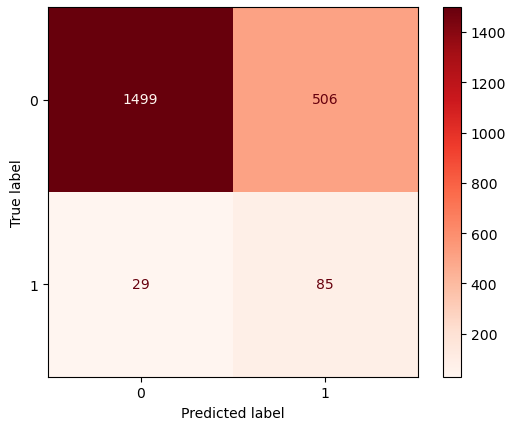

Using our selected predictive model in Part 3, we could predict and spray specific areas in Chicago.

We will use the selected Random Forest Total Predicted/Total score of 27.89% (85+506)/(85+506+1499+29) to determine percentage coverage to be sprayed.

Since Chicago has a land area of 145,747.7 acres, we will spray 40,649.03 acres.

#### Costs

Annual cost of spraying 27.89% of Chicago area for WNV season:

$2.558m * 27.89% = **\$713k**.

#### Benefits

For the targeted spraying, there will be areas we should have targeted but made a wrong prediction (False Negative).

We will use our Random Forest Recall score of 74.56% (85/(85+29)) of the base benefit to determine actual savings from spraying:
0.7456 * \$2.194m = **\$1.636m**

In [4]:
# calculate total medical + economic costs per patient annually
cost_savings_30 = 1636000/91
round(cost_savings_30,0)

17978.0

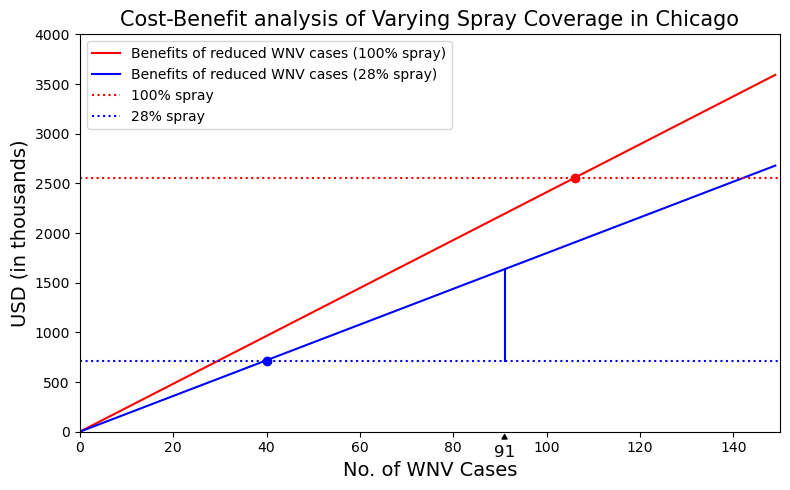

In [5]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_100/1000, color= 'r', label = 'Benefits of reduced WNV cases (100% spray)')
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_30/1000, color= 'b', label = 'Benefits of reduced WNV cases (28% spray)')
plt.plot([0, 150000], [2558, 2558], color='r', linestyle=':', label='100% spray')
plt.plot([0, 150000], [713, 713], color='b', linestyle=':', label='28% spray')

plt.scatter(106.1, 2558, color='r', marker='o')
plt.scatter(40, 713, color='b', marker='o')

plt.title('Cost-Benefit analysis of Varying Spray Coverage in Chicago', fontsize=15)
plt.xlabel('No. of WNV Cases', fontsize=14)
plt.ylabel('USD (in thousands)', fontsize=14)
plt.ylim(0, 4000)
plt.xlim(0, 150)
plt.legend()

# Add the annotation line
plt.plot([91, 91], [713, 17.978*91], color='blue')
plt.annotate('91', xy=(91, 0), xytext=(91, -250), ha='center', fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

plt.tight_layout()

The blue vertical line represents the net benefit of $923k. We can observe that with targeted spraying of high-risk areas with overall 28% coverage, the benefits outweigh the costs at 42 cases. However, with 100% spray coverage, the benefits can only be seen above 106 cases. Since our annual average number of cases is 91, we should strive to identify high-risk areas to maximise net benefit gained.

## 2. No. of Months to Spray

Based on our EDA, the WNV season in Chicago is between July to September. 

Based on 20-year historical average, the number of WNV Disease cases in USA for these 3 months are as follows:
- July: 7,217
- Aug: 21,791
- Sep: 18,080

Aug and Sep have higher proportion of WNV cases than July. 

Spraying only in Aug and Sep will reduce cost by 33% but the benefits of reduced medical and economic costs is only less by 15% (7,217 / 47,088). 

As such we should only spray in Aug and Sep. Note that the actual peak for each year varies as identified in our EDA.

As such we will assume annual cost of **\$1.705m** being 2 months of spraying and benefits of **\$1.865m** from reduced cases for Aug and Sep only.

In [6]:
# calculate total medical + economic costs per patient annually
cost_savings_peak_months = 1865000/91
round(cost_savings_peak_months,0)

20495.0

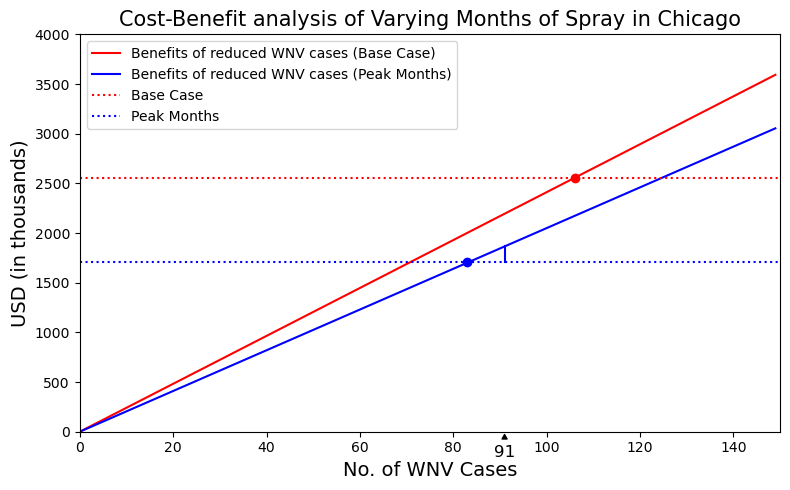

In [7]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_100/1000, color= 'r', label = 'Benefits of reduced WNV cases (Base Case)')
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_peak_months/1000, color= 'b', label = 'Benefits of reduced WNV cases (Peak Months)')
plt.plot([0, 150000], [2558, 2558], color='r', linestyle=':', label='Base Case')
plt.plot([0, 150000], [1705, 1705], color='b', linestyle=':', label='Peak Months')

plt.scatter(106, 2558, color='r', marker='o')
plt.scatter(83, 1705, color='b', marker='o')

# Add the annotation line
plt.plot([91, 91], [1705, 20.495*91], color='blue')
plt.annotate('91', xy=(91, 0), xytext=(91, -250), ha='center', fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

plt.title('Cost-Benefit analysis of Varying Months of Spray in Chicago', fontsize=15)
plt.xlabel('No. of WNV Cases', fontsize=14)
plt.ylabel('USD (in thousands)', fontsize=14)
plt.ylim(0, 4000)
plt.xlim(0, 150)
plt.legend()
plt.tight_layout()

The blue vertical line represents the net gain of $160k. We can observe that for spraying in peak months, the benefits outweigh the costs at 83 cases. However, with 100% spray coverage, the benefits can only be seen above 106 cases.

## 3. Frequency of Spray

We can also focus on reducing the frequency of spraying (e.g. fortnightly or monthly).

### Monthly basis

#### Costs

Annual cost of spraying entire Chicago area on a monthly basis:

$2.558m * (3/12 weeks) = **\$640k**.

#### Benefits

We will use a simplistic approach to derive benefits gained by dividing our base case by 4 (3 weeks out of 12):

\$2,194,000 / 4 = **\$549k**

In [8]:
# calculate total medical + economic costs per patient annually
cost_savings_monthly = 549000/91
round(cost_savings_monthly,0)

6033.0

### Fortnightly basis

#### Costs

Annual cost of spraying entire Chicago area on a fortnightly basis:

$2.558m * (6/12 weeks) = **\$1.279m**.

#### Benefits

We will use a simplistic approach to derive benefits gained by dividing our base case by 2 (6 weeks out of 12):

\$2,194,000 / 2 = **\$1.097m**

In [9]:
# calculate total medical + economic costs per patient annually
cost_savings_fortnightly = 1097000/91
round(cost_savings_fortnightly,0)

12055.0

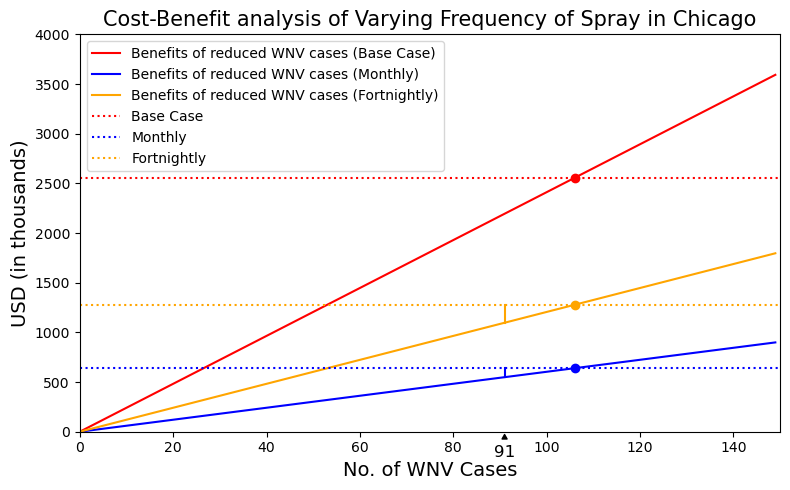

In [10]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_100/1000, color= 'r', label = 'Benefits of reduced WNV cases (Base Case)')
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_monthly/1000, color= 'b', label = 'Benefits of reduced WNV cases (Monthly)')
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_fortnightly/1000, color= 'orange', label = 'Benefits of reduced WNV cases (Fortnightly)')
plt.plot([0, 150000], [2558, 2558], color='r', linestyle=':', label='Base Case')
plt.plot([0, 150000], [640, 640], color='b', linestyle=':', label='Monthly')
plt.plot([0, 150000], [1279, 1279], color='orange', linestyle=':', label='Fortnightly')

plt.scatter(106, 2558, color='r', marker='o')
plt.scatter(106, 640, color='b', marker='o')
plt.scatter(106, 1279, color='orange', marker='o')

# Add the annotation line
plt.plot([91, 91], [12.055*91, 1279], color='orange')
plt.plot([91, 91], [6.033*91, 640], color='blue')
plt.annotate('91', xy=(91, 0), xytext=(91, -250), ha='center', fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

plt.title('Cost-Benefit analysis of Varying Frequency of Spray in Chicago', fontsize=15)
plt.xlabel('No. of WNV Cases', fontsize=14)
plt.ylabel('USD (in thousands)', fontsize=14)
plt.ylim(0, 4000)
plt.xlim(0, 150)
plt.legend()
plt.tight_layout()

The yellow and blue vertical lines represent the net losses of \$182k and \\$91k for a fortnightly and monthly basis respectively. We can observe that for all scenarios, the benefits only exceed costs above 106 cases; since our annual average cases is only 91, we should use other scenarios for analysis.

---
# Recommendations
---

### 28% Targeted Spray + Peak Months only

We recommend to use both targeted spraying (Scenario 1) and only spray in peak months (Scenario 2):

Costs = \$2.558m (base) * 27.89% (scenario 1) * 2/3 (scenario 2) = **\$476k**

Benefits = \$2.194m (base) * 74.56% (scenario 1) * 0.85 (scenario 2) = **\$1.39m**

In [11]:
# calculate total medical + economic costs per patient annually
cost_savings_hybrid = 1390469/91
round(cost_savings_hybrid,0)

15280.0

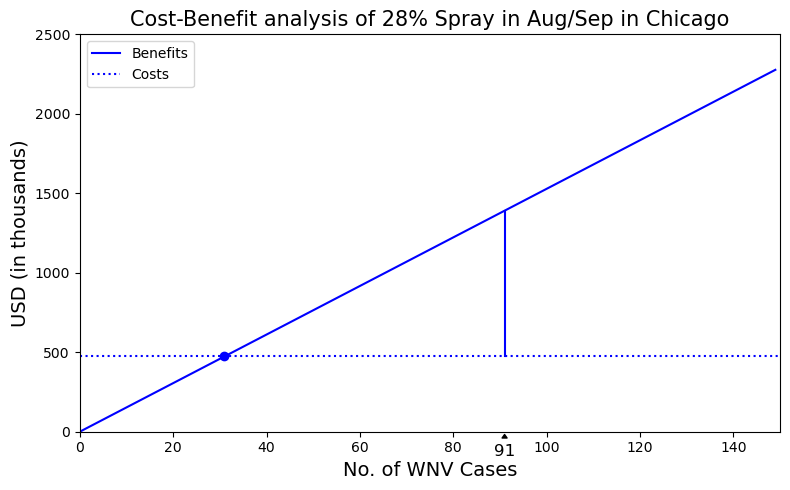

In [12]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_savings_hybrid/1000, color= 'b', label = 'Benefits')
plt.plot([0, 150000], [476, 476], color='b', linestyle=':', label='Costs')

plt.scatter(31, 476, color='b', marker='o')

# Add the annotation line
plt.plot([91, 91], [476, 15.28*91], color='blue')
plt.annotate('91', xy=(91, 0), xytext=(91, -150), ha='center', fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

plt.title('Cost-Benefit analysis of 28% Spray in Aug/Sep in Chicago', fontsize=15)
plt.xlabel('No. of WNV Cases', fontsize=14)
plt.ylabel('USD (in thousands)', fontsize=14)
plt.ylim(0, 2500)
plt.xlim(0, 150)
plt.legend()
plt.tight_layout()

The blue vertical line represents the net gain of \$914k for our hybrid approach.

### Overall Results

|  | Coverage | Total Costs (\$) | Total Benefits (\$) | Breakeven Cases |  Net Benefit / Cost (\$) |
|---|---:|---:|---:|---:|---:|
| Base Scenario | 100% | 2.558m | 2.194m | 106 | -364k |
| 28% Spray Coverage | 28% | 0.713m | 1.636m | 40 | 923k |
| Spray in Peak Months only | 100% | 1.705m | 1.865m | 83 | 160k |
| Monthly Basis | 100% | 0.640m | 0.549m | 106 | -91k |
| Fortnightly Basis | 100% | 1.279m | 1.097m | 106 | -182k |
| 28% Coverage + Peak Months | 28% | 0.476m | 1.39m | 31 | 914k |

The net benefit of the hybrid approach has risen compared to our earlier scenarios, only Scenario 1 has a slightly higher net benefit by 9k. As our hybrid approach has a breakeven point of only 31 cases, and the lowest spend on costs, we will proceed to choose this approach. The above analysis has shown that this combined approach of spraying in peak months with a targeted 28% spray in high-risk areas has proved more effective and cost-efficient than simply spraying without proper planning.

### Alternatives to consider

**Subsidising costs of pesticide** <br>
Offering subsidies for pesticides could motivate people to take action against the West Nile virus, particularly during the WNV season. By encouraging everyone to monitor and address potential breeding sites, we can reduce the population of infected mosquitoes and make progress in combating this disease. 

**Agricultural Drones** <br>
The use of agricultural drones may be much cheaper than activating a large fleet of spray trucks. Drones also have greater accessibility to areas out of reach of trucks, such as wetlands and rural areas, where there may be a greater number of high-risk areas.

**Explore possibility of lab-grown mosquitoes** <br>
Singapore has implemented a unique approach to combating the spread of Dengue virus by establishing a specialized [mosquito production facility](https://www.todayonline.com/singapore/nea-opens-new-facility-breed-5-million-mosquitoes-week-combat-dengue). Through this facility, they aim to breed 5 million male Wolbachia-carrying mosquitoes, which are released to mate with female Aedes mosquitoes, the carriers of Dengue virus. This process ultimately results in the production of biologically incompatible eggs that do not hatch. This innovative solution has yielded positive results and could be a potential strategy for the U.S to explore in their efforts to control the spread of the West Nile Virus.

---
# Conclusion
---

From our analysis conducted, we observe that the key factors that significantly impact the presence and spread of the West Nile virus are: daylight duration ('minutes_between'), period of the year ('week_number'), wet bulb temperature, wind speed and mosquito species.  

The analysis also highlights the importance of targeted spraying in high-risk areas during peak months as an effective approach to controlling the spread of the virus. It is recommended to use a combination of these approaches to maximize the benefits and cost-efficiency of the intervention.

This targeted approach relies on having a a good predictive model. Good information on peak months will also allow better optimisation of spraying cost-to-benefit. Our current best model (Random Forest) is respectable with AUC and Recall score both more than 0.70.
<br><br>
**Future improvements** <br>
In order to improve the AUC score further, we might need to explore techniques in designing validation to overcome these issues and make the models more robust. We could also use more data to train the model.

Additionally, we could also consider the long-term effects of West Nile Virus. For roughly 1 in every 150 infections, manifests into a severe neurological disease called West Nile Neuroinvasive Disease (WNND). For non-neuroinvasive WNV cases, the percentage of deaths is only 0.5%. However for WNND, the % of deaths is much higher at 9%. Including this in our cost-benefit analysis might get a more realistic assessment but will also make the analysis more complex.